# Introduction to graphviz in Jupyter Noboteook
The goal in this post is to introduce `graphviz` to draw the graph when we explain graph-related algorithm e.g., tree, binary search etc. It would be nicer to have such a visualization to quickly digest problems and solutions. 

Since we work with `TreeNode` and trees in a list-expresion e.g., [1, 2, null, 3] in LeetCode, the goal of this post is to easily convert the given tree in a list-expression into the visualization like below.


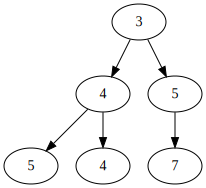

In [1]:
from IPython.core.display import SVG
SVG(filename='digraph.svg.svg')

# Basic Usage
First of all, let's plot simplest two nodes and the edge between them. 

In [2]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()

In [3]:
# Add nodes 1 and 2
dot.node('1')
dot.node('2')

# Add edge between 1 and 2
dot.edges(['12'])

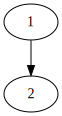

In [4]:
# Visualize the graph
dot

# Input Tree Nodes
Now we look at an example of input tree nodes like below. We wrote the function to merge two trees in [617. Merge Two Binary Trees](https://h1ros.github.io/posts/617-merge-two-binary-trees/) 

In [5]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        

class Solution(object):
    def mergeTrees(self, t1, t2):
        """
        :type t1: TreeNode
        :type t2: TreeNode
        :rtype: TreeNode
        """
        
        if t1 and t2:
            # Merge the values from two trees
            node = TreeNode(t1.val + t2.val)
            
            # Merge the left trees using the function recursively
            node.left = self.mergeTrees(t1.left, t2.left)
            
            # Merge the right trees using the function recursively
            node.right = self.mergeTrees(t1.right, t2.right)
            
            return node
            
        else:
            return t1 or t2
        

In [6]:
# Example 1

# Left tree
t1 = TreeNode(1)
t1.left = TreeNode(3)
t1.left.left = TreeNode(5)
t1.right = TreeNode(2)

# Right tree
t2 = TreeNode(2)
t2.left = TreeNode(1)
t2.left.right = TreeNode(4)
t2.right = TreeNode(3)
t2.right.right = TreeNode(7)

In [7]:
s = Solution()
merged_tree = s.mergeTrees(t1, t2)

## Visualize One Tree `t1`

### Manual creation

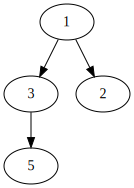

In [8]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')

# Add edges
dot.edges(['12', '13', '35'])

# Visualize the graph
dot

### Programatic Creation

In [9]:
def visualize_tree(tree):
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot
    

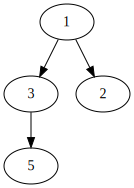

In [10]:
dot = visualize_tree(t1)

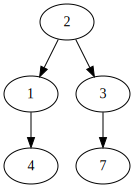

In [11]:
dot = visualize_tree(t2)

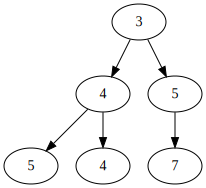

In [12]:
dot = visualize_tree(merged_tree)

In [13]:
# Save as svg file
dot.format = 'svg'
dot.view(filename='digraph.svg', directory='./')

'./digraph.svg.svg'

# Reference

We need `graphviz` package. You can also refer to [`graphviz` documentation](https://graphviz.readthedocs.io/en/stable/manual.html)


In [14]:
!pip install graphviz